# Libraries
These are the libraries we would need mostly.

In [71]:
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import SIMPApy as sp
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from statsmodels.stats.multitest import multipletests


## Retrieving datasets
These datasets can be found in Zenodo repository linked in the article.

Some prepared datasets generated here can be found in the GitHub repository: https://github.com/hasanalsharoh/SIMPA

In [ ]:
# get clinical data
pop_info = pd.read_csv(r"\clin.csv", sep=",", index_col=1) # can be found in zenodo or the SIMPA GitHub repo

In [ ]:
# get raw values for the genes and gene names template
tp = pd.read_csv(r"\p2postinteg_tpm_rnaseq_counts.csv", sep=',', index_col=0) # available in repositories linked
cn = pd.read_csv(r"\p2postinteg_cnvs.csv", sep=',', index_col=0) # available in repositories
meth = pd.read_csv(r"\p2postinteg_dnam_genes.csv", sep=',', index_col=0) # available in repositories
template = pd.read_csv(r"\p2postinteg_genename_ensembleid_template.csv", index_col=0) # available in repositories
# replace tp and cn indices with template gene name based on index
tp.index = template.loc[tp.index].gene_name
cn.index = template.loc[cn.index].gene_name

In [ ]:
simpa = sp.load_simpa(r"Datasets\SIMPAf - HALLMARK") # can be found in Zenodo SOPA_SIMPA_res

In [22]:
simpa

,Term,combined_pval,combined_z,fdr_bh,matched_genes,rna_lead_genes,cnv_lead_genes,dna_lead_genes,rna_nes,cnv_nes,dna_nes,mpes,sample_name
0,HALLMARK_COMPLEMENT,3.800825e-10,-6.261995,1.786388e-08,ACTN2;AKAP10;ANXA5;APOA4;APOC1;ATOX1;BRPF3;C1Q...,EHD1;FDX1;MMP15;CTSC;PIM1;L3MBTL4;GCA;GNGT2;CD...,EHD1;CTSC;MMP8;MMP13;APOA4;FDX1;MT3;MMP15;CDH1...,AKAP10;L3MBTL4;ATOX1;MMP15;FCN1;COL4A2;USP15;P...,-1.333858,-1.326412,-1.240011,-3.880761,tm1
1,HALLMARK_COAGULATION,2.506386e-09,-5.961039,5.890008e-08,A2M;ACOX2;ANXA1;APOA1;APOC1;APOC2;APOC3;ARF4;B...,MMP15;BMP1;SH2B2;DUSP14;APOC2;ANXA1;DPP4;CAPN5...,PRSS23;MMP8;MMP10;MMP7;APOC3;APOA1;MMP2;MMP15;...,A2M;PRSS23;MMP15;BMP1;VWF;CFB;ACOX2;ANXA1;PREP...,-1.275377,-1.342274,-1.156866,-4.881923,tm1
2,HALLMARK_UV_RESPONSE_UP,5.272653e-08,5.441862,8.260490e-07,ABCB1;APOM;ATP6V1F;BMP2;BTG1;BTG2;CA2;CCK;CDC3...,MRPL23;STIP1;BMP2;CDC34;GLS;FOS;GGH;CHRNA5;CXC...,STIP1;CYB5B;FMO1;CREG1;CYB5R1;BTG2;TCHH;PRPF3;...,PPP1R2;ABCB1;CYB5R1;HSPA13;NPTX2;RXRB;CNP;PRKA...,-0.775141,-0.953728,-0.796833,-22.044651,tm1
3,HALLMARK_INFLAMMATORY_RESPONSE,3.134187e-06,-4.661824,3.682669e-05,ABCA1;ACVR2A;ADM;ADORA2B;AHR;BDKRB1;BST2;BTG2;...,ABCA1;SLC31A2;FZD5;EMP3;PTGER4;TNFSF15;IRAK2;N...,CCL22;CX3CL1;CCL17;MYC;CD48;SLAMF1;IL10;RGS16;...,TLR2;BDKRB1;CCL7;IL1A;MARCO;KCNJ2;OPRK1;FPR1;I...,-1.735239,-0.900627,-1.039381,-3.163378,tm1
4,HALLMARK_INTERFERON_GAMMA_RESPONSE,4.193588e-06,4.601550,3.941973e-05,APOL6;ARID5B;B2M;BATF2;BST2;BTG1;C1R;CCL2;CCL5...,PFKP;HLA-A;PNP;HLA-B;LATS2;NUP93;PIM1;IL7;IRF9...,BATF2;PSMB10;MT2A;NUP93;NLRC5;IRF8;SLAMF7;CFH;...,PIM1;KLRK1;GBP4;LGALS3BP;BATF2;STAT2;GBP6;SOCS...,-1.000000,-1.151442,1.061322,-3.472972,tm1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92491,HALLMARK_APICAL_SURFACE,8.373674e-01,-0.205262,9.284559e-01,ADAM10;ADIPOR2;AKAP7;ATP8B1;B4GALT1;CD160;CROC...,EPHB4;EFNA5;FLOT2;HSPB1;RTN4RL1;THY1;PCSK9;NCO...,NCOA6;CD160;HSPB1;EPHB4;ADIPOR2;DCBLD2,EPHB4;SCUBE1;HSPB1;LYPD3;EFNA5;CX3CL1;SLC2A4,-0.919457,-0.864059,0.700202,-3.471674,tw879
92492,HALLMARK_PANCREAS_BETA_CELLS,8.873353e-01,-0.141677,9.478355e-01,ABCC8;CHGA;DPP4;ELP4;FOXO1;GCK;HNF1A;ISL1;NEUR...,FOXO1;PCSK2;SRP14;NKX6-1,SLC2A2;GCK;SST;PAX4;SRPRB;NKX2-2;PCSK2;DPP4;NE...,PDX1;NEUROG3;NKX2-2;ELP4;DPP4;NEUROD1,1.162424,-1.011576,-1.159165,-1.085866,tw879
92493,HALLMARK_INTERFERON_ALPHA_RESPONSE,9.213001e-01,0.098796,9.622468e-01,B2M;BATF2;BST2;CMPK2;CNP;DDX60;DHX58;GBP2;GBP4...,CNP;RIPK2;PROCR;PNPT1;PLSCR1;RNF31;PARP12;GMPR...,SELL;RIPK2;IL7;PROCR;OGFR;SAMD9L;SAMD9;TXNIP;R...,TRIM25;GMPR;USP18;PNPT1;IFI35;TMEM140;RSAD2;CM...,-0.578263,-1.338895,0.712731,-2.503770,tw879
92494,HALLMARK_PROTEIN_SECRETION,9.562888e-01,0.054811,9.770777e-01,ABCA1;ADAM10;AP3B1;AP3S1;ARFGEF1;ARFGEF2;ATP6V...,STX12;CLN5;SNX2;SH3GL2;MON2;VAMP4;LMAN1;STX7;G...,VAMP4;VPS45;ARFGEF1;RAB2A;RAB22A;EGFR;YKT6;ARF...,STX12;AP3S1;BET1,0.758398,-1.021707,-0.757494,-3.062343,tw879


In [ ]:
explore= sp.group_diffs(simpa,value_col='mpes')

this function allows us to explore which pathways can be significantly differentiated across two groups of samples.
Here, we see OXPHOS as highest p_adjusted.

In [52]:
explore

,pathway,mean_diff,p_value,statistic,p_adj,neg_log10_p_adj
0,HALLMARK_OXIDATIVE_PHOSPHORYLATION,-0.748665,0.000001,417473.0,0.000050,4.299465
1,HALLMARK_HEDGEHOG_SIGNALING,0.451594,0.000156,525998.5,0.003674,2.434846
2,HALLMARK_ESTROGEN_RESPONSE_EARLY,0.534679,0.000983,519915.0,0.012705,1.896037
3,HALLMARK_SPERMATOGENESIS,-0.385086,0.001081,437652.5,0.012705,1.896037
4,HALLMARK_ADIPOGENESIS,-0.455495,0.002490,440709.0,0.023402,1.630747
5,HALLMARK_NOTCH_SIGNALING,0.408736,0.005480,513423.5,0.042927,1.367265
6,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.465689,0.007895,511909.0,0.053009,1.275652
7,HALLMARK_MYC_TARGETS_V1,-0.601208,0.009878,446280.0,0.058032,1.236334
8,HALLMARK_COAGULATION,0.284865,0.014630,509213.0,0.076403,1.116890
9,HALLMARK_APICAL_JUNCTION,0.349940,0.025280,506652.5,0.118817,0.925121


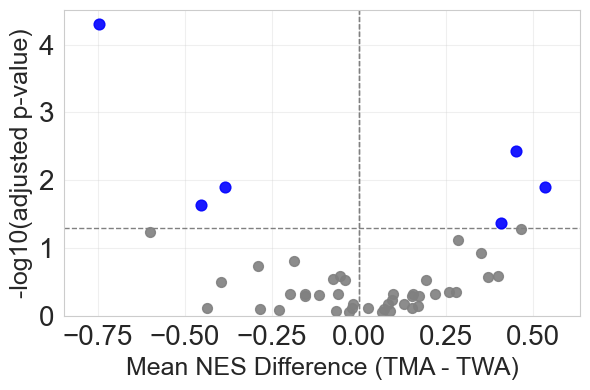

In [ ]:
sp.plot_volcano(explore, mean_thresh=0) 

The function above allows us to visualize the differences between samples. The arbitrary effect size (mean MPES/NES threshold is set to 0.5, but in this example is adjusted to 0) 

In [23]:
# here we can for example check for the most commonly significantly differentially expressed pathways in the population
simpa['Term'][simpa['fdr_bh']<0.05].value_counts()

Term
HALLMARK_E2F_TARGETS                          1293
HALLMARK_MYC_TARGETS_V1                       1204
HALLMARK_OXIDATIVE_PHOSPHORYLATION            1134
HALLMARK_G2M_CHECKPOINT                       1131
HALLMARK_INTERFERON_GAMMA_RESPONSE             907
HALLMARK_ALLOGRAFT_REJECTION                   872
HALLMARK_MYC_TARGETS_V2                        806
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION     775
HALLMARK_MTORC1_SIGNALING                      773
HALLMARK_INFLAMMATORY_RESPONSE                 771
HALLMARK_INTERFERON_ALPHA_RESPONSE             688
HALLMARK_TNFA_SIGNALING_VIA_NFKB               677
HALLMARK_MITOTIC_SPINDLE                       646
HALLMARK_ADIPOGENESIS                          547
HALLMARK_PROTEIN_SECRETION                     462
HALLMARK_IL2_STAT5_SIGNALING                   413
HALLMARK_UNFOLDED_PROTEIN_RESPONSE             394
HALLMARK_DNA_REPAIR                            390
HALLMARK_COMPLEMENT                            375
HALLMARK_KRAS_SIGNALING_UP

# Going through OXPHOS for investigations, hypothesis generation, and data exploration
The power of SIMPA is mainly represented by its capability to provide insights that empower data exploration and hypothesis generation and testing.

For example, here we will explore one pathway, and see how are the differences between populations (cases and controls).

The data used here can be found in the Zenodo repository linked in the main page, which is directly incorporated in the manuscript.

In [29]:
# here we simply filter the large SIMPA dataset to a smaller one containing terms with over 1000 significant enrichments
# in this example we will pick oxidative phosphorylation (OXPHOS) and perform exploratory analyses
sigsimp = simpa[simpa['Term']=='HALLMARK_OXIDATIVE_PHOSPHORYLATION'].copy()

In [30]:
sigsimp

,Term,combined_pval,combined_z,fdr_bh,matched_genes,rna_lead_genes,cnv_lead_genes,dna_lead_genes,rna_nes,cnv_nes,dna_nes,mpes,sample_name
20,HALLMARK_OXIDATIVE_PHOSPHORYLATION,3.375166e-01,-0.959084,7.403388e-01,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,ACADSB;NDUFS8;MRPS30;COX6C;GLUD1;SLC25A12;UQCR...,TIMM10;COX8A;NDUFC2;DLAT;SDHD;FDX1;ACAT1;GOT2;...,SLC25A12;COX6C;NDUFS8;LRPPRC;ACAA2;MDH2;COX10;...,1.090854,-1.384630,-1.101314,0.305602,tm1
70,HALLMARK_OXIDATIVE_PHOSPHORYLATION,3.868327e-01,-0.865375,7.294129e-01,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,NDUFB5;GPI;COX10;GOT2;TOMM22;MRPS22;ISCA1;POLR...,COX10;NDUFS7;TIMM13;ACAA2;COX17;GOT2;NDUFA7;CO...,MRPL34;OXA1L;COX5A;OAT;NDUFAB1;NDUFV2;ATP6V1F;...,0.692252,1.002453,0.952934,2.462544,tm2
94,HALLMARK_OXIDATIVE_PHOSPHORYLATION,3.151077e-09,5.923528,1.481006e-07,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,NDUFS6;COX6B1;MGST3;VDAC2;MRPS15;NQO2;FDX1;UQC...,SLC25A4;NDUFC1;GRPEL1;COX10;GPI;COX6B1;TIMM50;...,COX17;TIMM50;ECH1;SUPV3L1;SUCLG1;SDHD;AFG3L2;G...,2.111943,0.980472,1.432235,5.661226,tm3
151,HALLMARK_OXIDATIVE_PHOSPHORYLATION,1.415390e-05,-4.341460,6.047577e-05,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,COX10;FH;GRPEL1;MRPL15;CYC1;SLC25A20;DLD;NDUFA...,MGST3;TIMM17A;FH;COX6C;CYC1;UQCRB;DECR1;NDUFS6...,NDUFC1;GOT2;SLC25A20;MTRF1;NDUFA4;LDHB;ACO2;CO...,-2.128457,-1.367574,1.479952,-1.138413,tm4
190,HALLMARK_OXIDATIVE_PHOSPHORYLATION,8.297410e-11,-6.495108,1.299928e-09,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,GRPEL1;CS;SDHB;LRPPRC;FH;MDH2;SUPV3L1;COX10;DL...,MGST3;TIMM17A;FH;COX6C;CYC1;UQCRB;DECR1;NDUFS6...,CYB5R3;SLC25A20;ACO2;GRPEL1;MRPS15;UQCRH;MDH1;...,-1.980628,-1.360694,0.758111,-2.570777,tm5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92280,HALLMARK_OXIDATIVE_PHOSPHORYLATION,2.286039e-01,-1.203963,5.372191e-01,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,SLC25A20;PMPCA;UQCRQ;TIMM17A;UQCRH;MRPS15;NDUF...,MRPL34;NDUFA7;TIMM13;NDUFS7;NDUFB7;SDHB;DECR1;...,DECR1;SLC25A4;COX8A;TIMM10;MRPL34;MRPS30;RHOT2...,1.002218,-1.106656,-1.321484,-2.449490,tw875
92331,HALLMARK_OXIDATIVE_PHOSPHORYLATION,3.520998e-01,-0.930524,6.895288e-01,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,COX6C;MGST3;NDUFS8;COX8A;COX6A1;GLUD1;HSPA9;ND...,COX8A;NDUFS8;NDUFB1;DLST;ALDH6A1;ATP6V1D;OXA1L...,AFG3L2;NDUFV2;DECR1;SURF1;ACADSB;COX4I1;TIMM10...,1.361486,0.918383,0.621799,2.785118,tw876
92377,HALLMARK_OXIDATIVE_PHOSPHORYLATION,2.733959e-01,1.095276,5.757364e-01,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,NDUFB5;ISCA1;GPI;OXA1L;IDH3A;DLST;GRPEL1;AFG3L...,IDH3A;DLST;ALDH6A1;OXA1L;CS;NDUFB1;ATP6V1F;RET...,NDUFS4;IDH3A;MRPS22;ALDH6A1;SUPV3L1;NDUFA5;RET...,1.100802,1.115402,-0.854336,2.449490,tw877
92408,HALLMARK_OXIDATIVE_PHOSPHORYLATION,7.718863e-02,1.767237,4.947272e-01,ACAA2;ACADSB;ACAT1;ACO2;AFG3L2;ALDH6A1;ATP6V0C...,UQCRB;COX5A;UQCRH;ACAA2;CYC1;DECR1;UQCRC2;SDHB...,MGST3;TIMM17A;FH;NDUFS6;MRPS30;PDK4;NDUFA4;NDU...,TIMM13;PDHB;GPI;TOMM22;ACAA2;SDHB;VDAC1;NDUFB7...,1.441094,-1.012569,-0.743194,2.410186,tw878


In [31]:
sigsimp['group'] = sigsimp['sample_name'].apply(lambda x: 'TMA' if x.startswith('tm') else 'TWA')

we used the above code to mark groups (TMAs and TWAs). Afterwards, we can melt the dataframe to conduct some analyses.

In [32]:
oxphos_long = pd.melt(
    sigsimp,
    id_vars=['sample_name', 'group'],
    value_vars=['rna_nes', 'cnv_nes', 'dna_nes'],
    var_name='omic',
    value_name='nes'
)

# Clean up the 'omic' names for a nicer plot label
omic_name_map = {
    'rna_nes': 'RNAseq',
    'cnv_nes': 'CNV',
    'dna_nes': 'DNAm'
}
oxphos_long['omic'] = oxphos_long['omic'].map(omic_name_map)

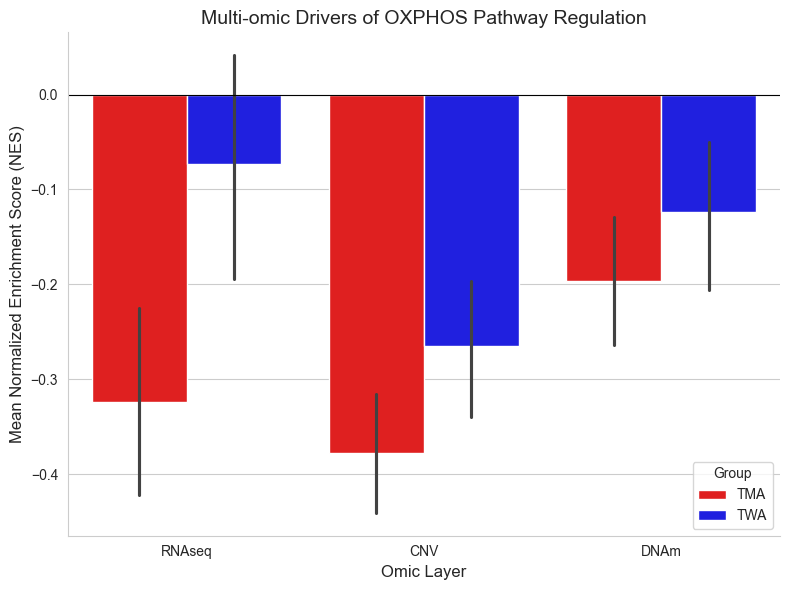

In [ ]:
# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create the grouped bar plot
# Seaborn's barplot will automatically calculate the mean of the 'nes' for each
# 'omic' and 'group'. The error bars represent 95% confidence intervals by default.
ax = sns.barplot(
    data=oxphos_long,
    x='omic',
    y='nes',
    hue='group',
    palette={'TWA': 'blue', 'TMA': 'red'}, 
    order=['RNAseq', 'CNV', 'DNAm'] 
)

ax.axhline(0, color='black', linewidth=0.8)


ax.set_xlabel("Omic Layer", fontsize=12)
ax.set_ylabel("Mean Normalized Enrichment Score (NES)", fontsize=12)
ax.set_title("Multi-omic Drivers of OXPHOS Pathway Regulation", fontsize=14)

ax.legend(title='Group')

sns.despine()

plt.tight_layout()
plt.show()

Based on the above, we can visually tell that the different multiomics contribute differently to pathway activity of OXPHOS across the different groups through MPES provided by SIMPApy.

Now, we can for example explore if the differences are truly significant.

In [39]:
# --- Calculate the p-value ---
twa_mpes = sigsimp[sigsimp['group'] == 'TWA']['mpes']
tma_mpes = sigsimp[sigsimp['group'] == 'TMA']['mpes']
u_stat, p_value = mannwhitneyu(twa_mpes, tma_mpes, alternative='two-sided')

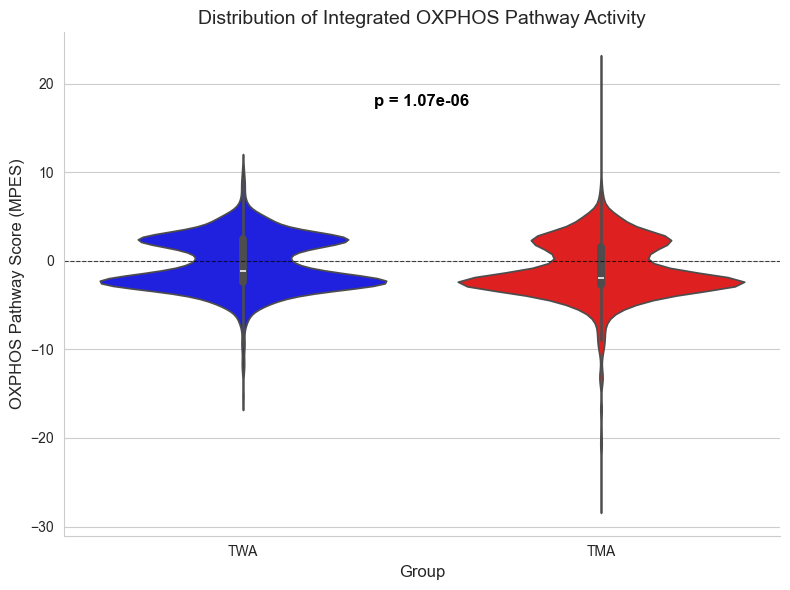

In [72]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.violinplot(
    data=sigsimp,
    x='group',
    y='mpes',
    palette={'TWA': 'blue', 'TMA': 'red'},
    order=['TWA', 'TMA'],
    inner='box'
)

# Format the p-value for display
p_value_text = f'p = {p_value:.2e}' # Format in scientific notation, e.g., p = 1.93e-04

# Add the text to the plot.
y_max = sigsimp['mpes'].max()
y_pos = y_max * 0.8
ax.text(0.5, y_pos, p_value_text, ha='center', va='bottom', fontsize=12, weight='bold', color='black')

# labels 
ax.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
ax.set_xlabel("Group", fontsize=12)
ax.set_ylabel("OXPHOS Pathway Score (MPES)", fontsize=12)
ax.set_title("Distribution of Integrated OXPHOS Pathway Activity", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

here we can see that the differences in MPES between our case and control groups for OXPHOS are significant, making it a worthy target to explore in vitro.

# Single sample exploration

In [ ]:
tmas1, twas1 = sp.process_multiomics_data(sigsimp, tp, cn, meth, pop_info) # further processing of simpa data for downstream analyses

In [ ]:
tmas1.to_csv(r"tmas_oxphos_simpa.csv", index=False)
twas1.to_csv(r"twas_oxphos_simpa.csv", index=False) # these two datasets can be found in the example section

In [ ]:
tmas1 = pd.read_csv(r"tmas_oxphos_simpa.csv")

In [ ]:
sp.create_interactive_plot(tmas1)

Here for example, we first selected filter by Gene, and looked up COX6C, which showed more downregulation for a large number of case patients compared to control counterparts.

![.](https://github.com/hasanalsharoh/SIMPApy/blob/main/images/3D_TMAs_COX6C.png?raw=true)

Now, assuming we want to see how a single sample is behaving (whether single cell or a single patient) within a single pathway (we're still in OXPHOS), we can filter by Sample, let's select "tm601", and Omic Type "mpes". 

![.](https://github.com/hasanalsharoh/SIMPApy/blob/main/images/3D_tm601.png?raw=true)

We can see this sample has around 3 genes tagged in the MPES "layer" (aka considered lead genes in the RNAseq, CNV, and DNAm layers). This can be easily distinguished once we use the Normalize untagged checkbox, which leaves only genes that are tagged in the selected --omic (says Tagged: 1 on hover)

One of the lead genes was COX6C, which we can tell as we hover the blue dot to the right. Thus, we can further investigate this gene further according to our specific hypothesis.